# Concrete Compressive Strength Dataset

#### Import the required libraries first!

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
from matplotlib import pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import pandas as pd
import numpy as np
import time

## Problem Description
Concrete is one of the most important materials in Civil Engineering. It is the foundation of buildings, highways, bridges, and more. Concrete and its derivatives are weak in tension, but extremely strong under compression forces. The compressive strength measures the endurance of the concrete mixture before fracture occurs. To measure the maximum compression strength, laboratory tests are performed by applying compression strength to the concrete sample and plotting the compression against the applied force. However, this test is difficult to perform and it is also expensive. The objective of the dataset is to find the relation between the mixture of the materials of the concrete and the compressive strength. The dataset can be obtained from <a>https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls</a>.

The problem will be tackled by using the following methods:
1. Linear Regression
2. Kernel Ridge Regression
3. Lasso Regression
4. Support Vector Regression
5. Neural Network

Then, the performance of each one of the methods will be compared and conclusions will be drawn. 

## Exploratory Data Analysis

Import the dataset from the University of California Irvine (UCI) Machine Learning Repository 

In [2]:
df_full = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
pd.options.display.float_format = "{:,.4f}".format
print(f'Rows {df_full.shape[0]}, Columns {df_full.shape[1]}')
df_full.head()

Rows 1030, Columns 9


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0000,0.0000,0.0000,162.0000,2.5000,"1,040.0000",676.0000,28,79.9861
1,540.0000,0.0000,0.0000,162.0000,2.5000,"1,055.0000",676.0000,28,61.8874
2,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,270,40.2695
3,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,365,41.0528
4,198.6000,132.4000,0.0000,192.0000,0.0000,978.4000,825.5000,360,44.2961


#### Overview
- 1030 samples
- 8 Features:
    - <b>Cement (Kg/m<sup>3</sup>)</b>: Binder material for concrete mixture.
    - <b>Blast Furnace Slag (Kg/m<sup>3</sup>)</b>: By-product of iron production. Used to strengthen the concrete.
    - <b>Fly Ash (Kg/m<sup>3</sup>)</b>: Improves workability and plasticity of the concrete.
    - <b>Water (Kg/m<sup>3</sup>)</b>: No need to be introduced.
    - <b>Superplasticizer (Kg/m<sup>3</sup>)</b>: Compound to reduce use of water in high strength concrete.
    - <b>Coarse aggregate (Kg/m<sup>3</sup>)</b>: Irregular and granular materials such as sand or gravel. It is used to help the concrete mixture more compact.
    - <b>Fine aggregate (Kg/m<sup>3</sup>)</b>: Smaller compounds to compact and smooth the concrete mixture.
    - <b>Age (days)</b>: Days for curing the concrete mixture before the strength test. 
- Target:
    - <b>Concrete compressive strength (MPa)</b>: Maximum compressive stress that, under a gradually applied load, a given solid material can sustain without fracture. It may indicate the quality or performance of the concrete mixture.

Since the column names are too long, we can change them to be only the component or ingredient of the mixture. 

In [3]:
# We use a lambda function to remove everything after the first parentheses
df_full = df_full.rename(columns=lambda x: x.split('(')[0].strip())
df_full.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0000,0.0000,0.0000,162.0000,2.5000,"1,040.0000",676.0000,28,79.9861
1,540.0000,0.0000,0.0000,162.0000,2.5000,"1,055.0000",676.0000,28,61.8874
2,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,270,40.2695
3,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,365,41.0528
4,198.6000,132.4000,0.0000,192.0000,0.0000,978.4000,825.5000,360,44.2961


In [4]:
# First, simple descriptive statistical analysis
df_full.describe().T[['min', 'max', 'mean', 'std']]

,min,max,mean,std
Cement,102.0000,540.0000,281.1656,104.5071
Blast Furnace Slag,0.0000,359.4000,73.8955,86.2791
Fly Ash,0.0000,200.1000,54.1871,63.9965
Water,121.7500,247.0000,181.5664,21.3556
Superplasticizer,0.0000,32.2000,6.2031,5.9735
Coarse Aggregate,801.0000,"1,145.0000",972.9186,77.7538
Fine Aggregate,594.0000,992.6000,773.5789,80.1754
Age,1.0000,365.0000,45.6621,63.1699
Concrete compressive strength,2.3318,82.5992,35.8178,16.7057


We can observe that the ranges of all features are different in scale. For example the <b>Fly Ash</b> component goes from 0Kg to 359.40Kg, while the <b>Water</b> varies from 121.75Kg to 247.00Kg. This is an indication that normalization must be performed before training any regression model.

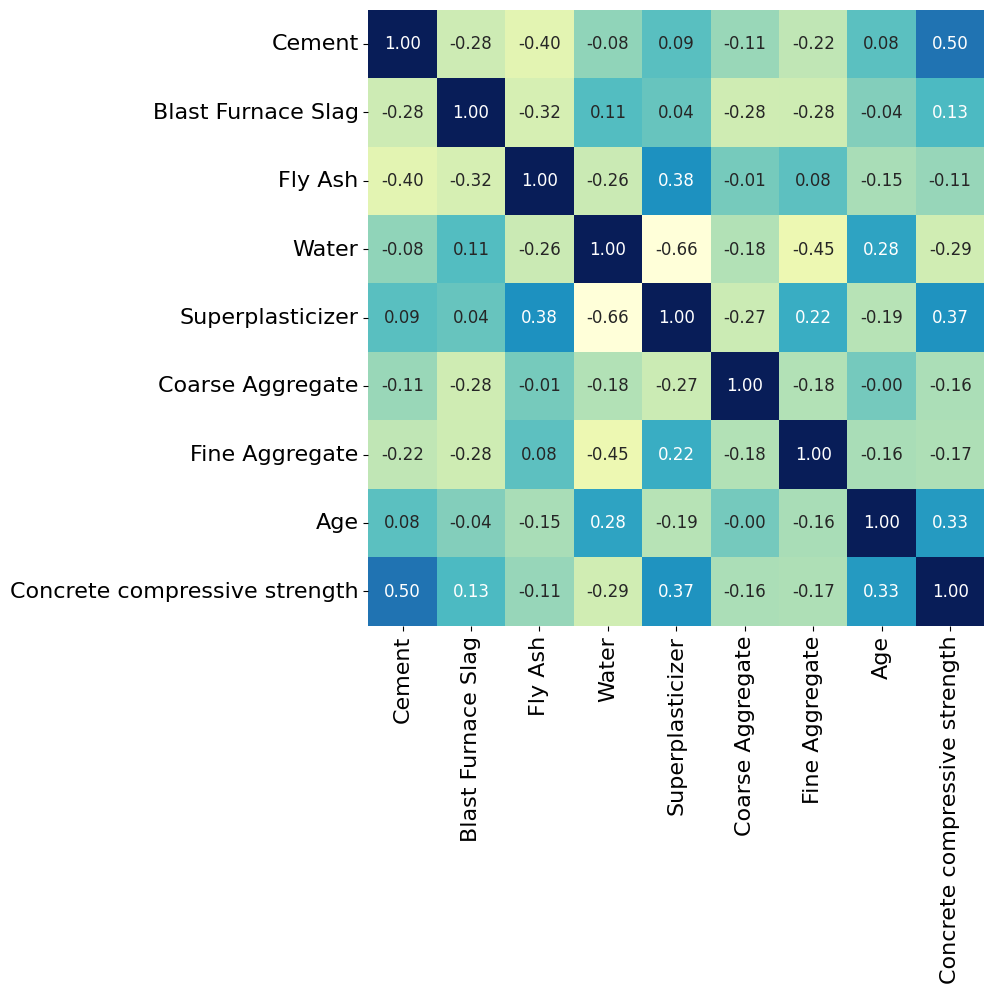

In [5]:
# Correlation matrix
corr_mat = df_full.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_mat, cbar=False, square=True, annot=True, 
            annot_kws={'fontsize': 12}, cmap='YlGnBu', fmt='.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

There is no evidence of correlation between the features, which is expected from the kind of dataset. Each individual component is independent from the others. However, it is noticed that the the <b>Concrete compressive strength</b> presents a higher correlation coefficient with the <b>Cement</b>, <b>Superplasticizer</b> and <b>Age</b> (0.50, 0.37, and 0.33, respectively). This is also expected, given that the <b>Cement</b> is the main ingredient for concrete.

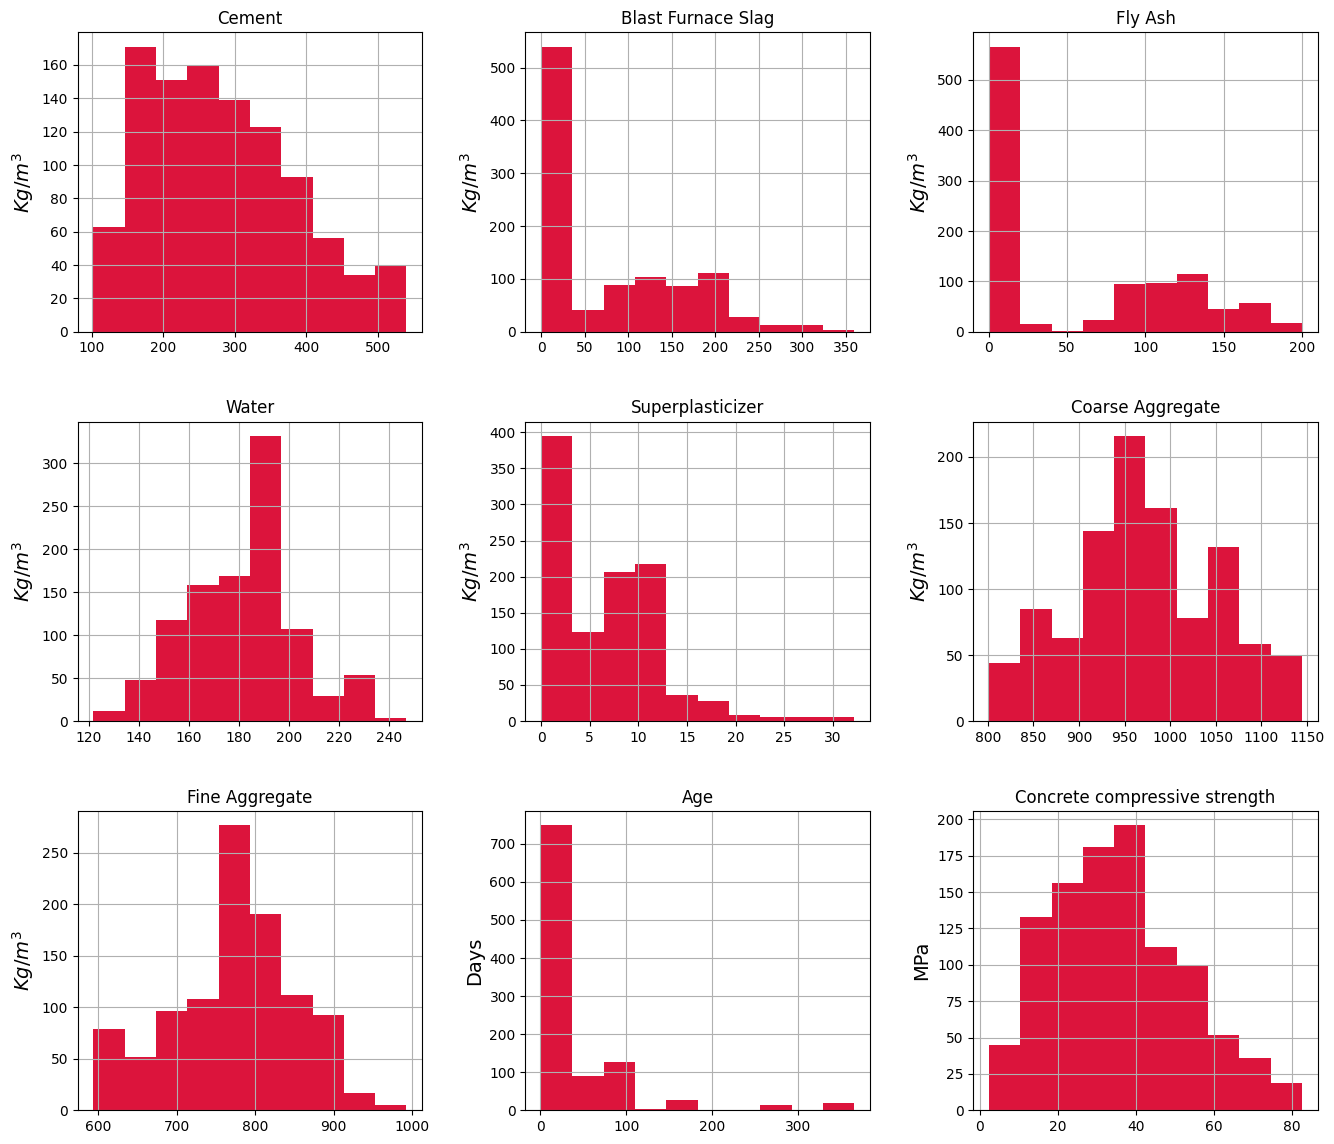

In [6]:
# Some visualization
ylabels = [f'$Kg/m^3$']*(len(df_full.columns) - 2) + ['Days'] + ['MPa']
fig, ax = plt.subplots(3, 3, figsize=(16, 14))
df_full.hist(ax=ax, color='crimson')
ax = ax.flatten()
for i in range(len(ax) ):
    ax[i].set_ylabel(ylabels[i], fontsize=14)
plt.show()

The histograms of the features and predicted variable are mostly normally distributed. Only the <b>Age</b> feature has a right skew, with most of the data located towards the right side (less curing days). Given the observations, the data can be either normalized using <code>Min-Max</code> or <code>Z-norm</code>. For this case, <code>Min-Max</code> normalization will be used.

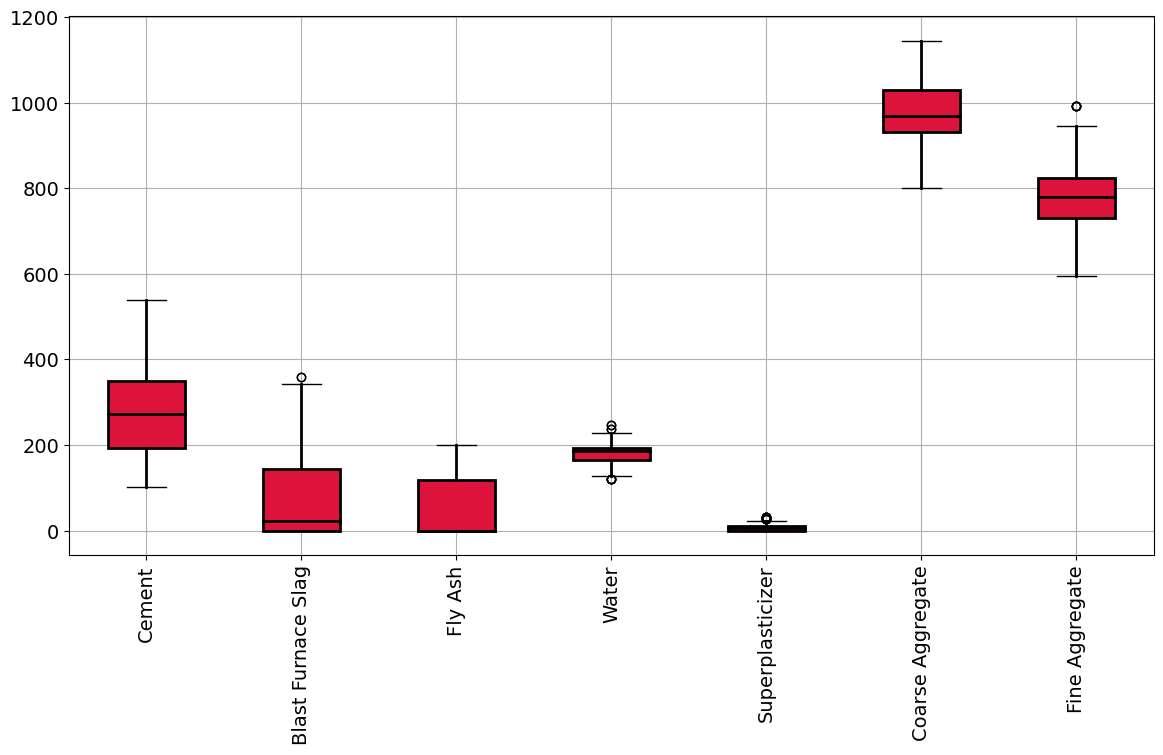

In [7]:
# Boxplots of ingredients
boxes = df_full[[df_full.columns[i] for i in range(len(df_full.columns) - 2)]].boxplot(figsize=(14, 7), 
                                                                                       rot=90, fontsize=14, 
                                                                                       return_type='dict', 
                                                                                       patch_artist=True)
[item.set(color='black', linewidth=2) for item in boxes['whiskers']]
[item.set(color='black', linewidth=2) for item in boxes['boxes']]
[item.set(facecolor='crimson') for item in boxes['boxes']]
[item.set(color='black', linewidth=2) for item in boxes['medians']]
plt.show()

From the boxplot of the ingredients, we can observe that most of the data is located between 0Kg and 500Kg. Only both <b>Coarse</b> and <b>Fine</b> aggregates have values outside that range. None of the data presents significant outliers, so there is no sense in removing data points. 

## Regression Models

To evaluate the models, a K-fold with 5 folds will be performed in the dataset. For each model, a Grid Search will be executed in order to obtain the best parameters (with the exception of Linear Regression, which does not involve any parameters). 

In [8]:
# Set regression models for grid search
models = [
    LinearRegression(),
    GridSearchCV(
        KernelRidge(kernel='linear', gamma=.1), scoring='neg_mean_squared_error',
        param_grid={'alpha': [10**i for i in range(-4, 1)], 'gamma': np.logspace(-2, 2, 5)}
    ),
    GridSearchCV(
        Lasso(),
        param_grid={'alpha': [10**i for i in range(-4, 1)]}
    ),
    GridSearchCV(
        SVR(kernel='rbf', gamma=.1),
        param_grid={'C': [10**i for i in range(5)], 'gamma': np.logspace(-2, 2, 5)}
    ),
    GridSearchCV(
        MLPRegressor(max_iter=10000),
        param_grid={'hidden_layer_sizes': [[40]*i for i in range(1, 5)]}
    )
]
model_names = ['Linear Regression', 'Kernel Ridge', 'Lasso', 'Support Vector Regressor', 'MLP']

In [9]:
# 5-fold for each model
errors = []
reals = []
preds = []
for model, name in zip(models, model_names):
    print(f'Evaluating {name}...')
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    k_errors = []
    k_reals = []
    k_preds = []
    for i, (train_index, test_index) in enumerate(kf.split(df_full)):
        # Separate the data
        train = df_full.values[train_index]
        test = df_full.values[test_index]
        
        # Standard scaler
        scaler = MinMaxScaler()
        scaled_train = scaler.fit_transform(train)
        scaled_test = scaler.transform(test)
        y_min, y_max = scaler.data_min_[-1], scaler.data_max_[-1]
        
        # Features and predicted variable
        x_train, y_train = scaled_train[:, :-1], scaled_train[:, -1]
        x_test, y_test = scaled_test[:, :-1], scaled_test[:, -1]
        
        # Fit the model
        model.fit(x_train, y_train)
        best_model = model
        if isinstance(model, GridSearchCV):
            best_model = model.best_estimator_
        
        # Evaluate with test dataset
        pred = best_model.predict(x_test)
        mse = mean_squared_error(pred, y_test)
        r2 = r2_score(pred, y_test)
        pred = y_min + (pred * (y_max - y_min))
        inv_test = y_min + (y_test * (y_max - y_min))
        
        # Append errors, ground true and estimations
        k_errors.append(inv_test - pred)
        k_reals.append(inv_test)
        k_preds.append(pred)
        
        print('\t{}-Fold -- MSE: {:,.2f}, R2: {:,.4f}'.format(i+1, mse, r2))
    
    errors.append(np.array(k_errors).ravel())
    reals.append(np.array(k_reals).ravel())
    preds.append(np.array(k_preds).ravel())
    
    print()

Evaluating Linear Regression...
	1-Fold -- MSE: 0.01, R2: 0.4164
	2-Fold -- MSE: 0.02, R2: 0.2907
	3-Fold -- MSE: 0.02, R2: 0.2960
	4-Fold -- MSE: 0.02, R2: 0.3908
	5-Fold -- MSE: 0.02, R2: 0.4096

Evaluating Kernel Ridge...
	1-Fold -- MSE: 0.01, R2: 0.3697
	2-Fold -- MSE: 0.02, R2: 0.2214
	3-Fold -- MSE: 0.02, R2: 0.2502
	4-Fold -- MSE: 0.02, R2: 0.3422
	5-Fold -- MSE: 0.02, R2: 0.3688

Evaluating Lasso...
	1-Fold -- MSE: 0.01, R2: 0.3152
	2-Fold -- MSE: 0.02, R2: 0.1248
	3-Fold -- MSE: 0.02, R2: 0.1733
	4-Fold -- MSE: 0.02, R2: 0.2830
	5-Fold -- MSE: 0.02, R2: 0.3952

Evaluating Support Vector Regressor...
	1-Fold -- MSE: 0.01, R2: 0.7299
	2-Fold -- MSE: 0.01, R2: 0.6562
	3-Fold -- MSE: 0.01, R2: 0.6659
	4-Fold -- MSE: 0.01, R2: 0.6390
	5-Fold -- MSE: 0.01, R2: 0.7299

Evaluating MLP...
	1-Fold -- MSE: 0.01, R2: 0.8227
	2-Fold -- MSE: 0.01, R2: 0.6641
	3-Fold -- MSE: 0.01, R2: 0.8017
	4-Fold -- MSE: 0.01, R2: 0.7725
	5-Fold -- MSE: 0.01, R2: 0.8226



According to the $R^2$ score of the folds for each individual model, the regression task has been successful. Do not be fooled by the MSE, since the data has been scaled, the result of the MSE does not reflect the original scale of the dataset. Now that we have the best estimators and the errors for each estimator, it is time to compare the performance of the methods and determine which method is the most suited for the task.

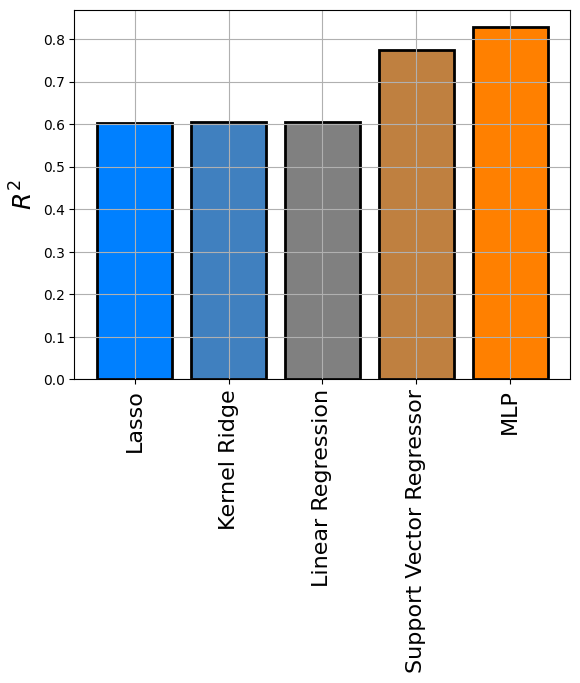

In [10]:
# Plot R2 score sorted by score
r2s = [r2_score(real, pred) for real, pred in zip(reals, preds)]
sort_idx = np.argsort(r2s).astype(int)
colors = [(c, 0.5, 1-c) for c in np.linspace(0, 1, 5)]
plt.bar(np.array(model_names)[sort_idx], np.array(r2s)[sort_idx], color=colors, edgecolor='black', linewidth=2)
plt.xticks(rotation=90, fontsize=16)
plt.ylabel(f'$R^2$', fontsize=18)
plt.grid()

It is noticed that the $R^2$ value is much higher for the <b>SVR</b> and the <b>MLP</b> regressors. The other three models performed similarly, with a $R^2$ close to 0.6. Looking only at the $R^2$, the <b>MLP</b> yielded a better fit to the data for the regression task. Now, let's take a look at the estimation errors, to visualize if the hypothesis holds true.

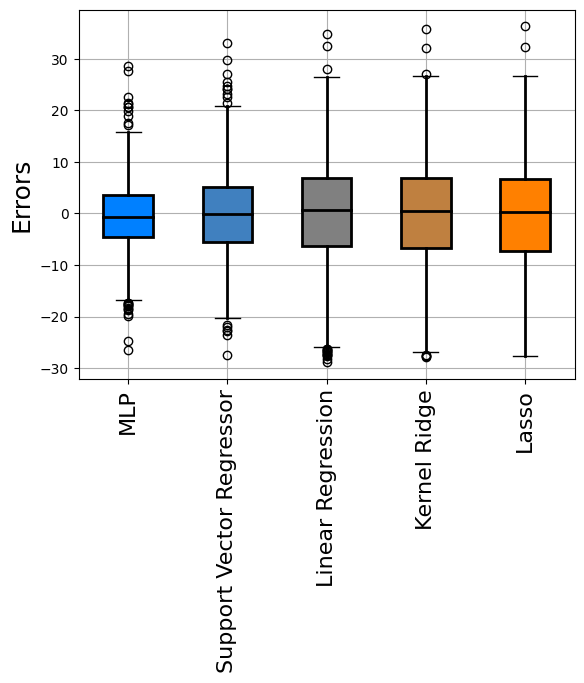

In [11]:
# Use the boxplot as a visualization tool for the errors
error_boxes = plt.boxplot(np.array(errors).T[:, sort_idx[::-1]], patch_artist=True, labels=np.array(model_names)[sort_idx][::-1])
colors = [(c, 0.5, 1-c) for c in np.linspace(0, 1, 5)]
plt.xticks(rotation=90, fontsize=16)
plt.ylabel('Errors', fontsize=18)
[item.set(color='black', linewidth=2) for item in error_boxes['boxes']]
[item.set(facecolor=colors[i]) for i, item in enumerate(error_boxes['boxes'])]
[item.set(color='black', linewidth=2) for item in error_boxes['medians']]
[item.set(color='black', linewidth=2) for item in error_boxes['whiskers']]
plt.grid()

As expected, according to the $R^2$ score and the estimation errors, the <b>MLP</b> regressor yielded more accurate results. The spread in the <b>MLP</b> regressor is noticeable smaller (the size of the boxes is smaller, which means the interquartile distance is smaller). Now let's take a look at the estimation errors descriptive statistics.

In [12]:
# Summary of absolute estimation errors
abs_errors = np.abs(errors)
summary = np.array([
    abs_errors.min(1),
    abs_errors.max(1),
    abs_errors.mean(1),
    abs_errors.std(1),
    r2s
])
df_summary = pd.DataFrame(summary[:, sort_idx].T[::-1], columns=['Min', 'Max', 'Mean', 'STD', 'R2'], index=np.array(model_names)[sort_idx][::-1])
df_summary

,Min,Max,Mean,STD,R2
MLP,0.0049,28.6567,5.3548,4.4013,0.8277
Support Vector Regressor,0.0030,33.1430,6.2184,4.9227,0.7744
Linear Regression,0.0056,34.7426,8.2998,6.4066,0.6057
Kernel Ridge,0.0261,35.6897,8.3450,6.3506,0.6056
Lasso,0.0123,36.2601,8.4044,6.3586,0.6016


The statistics of the absolute estimation errors show that the <b>MLP</b> regressor yielded a more accurate prediction. The mean estimation error is 5.50MPa, with a maximum estimation error of 30.17MPa. The worst model was the <b>Lasso</b> regressor, with a mean estimation error of 8.40MPa and a maximum error of 36.26MPa. It is shown that a simple <b>MLP</b> is capable of predicting the compressive strenght in High Performance Concrete by using only the weight of the ingredients used for the concrete mixture.

## Summary and Conclusions 

In this notebook, the problem of predicting the Compressive Strength of High Performance Concrete (HPC) is tackled by using different Machine Learning methods. The data is first analyzed for pattern recognition and pre-processing. A simple normalization was used as pre-processing of the data before being input to the models for learning. Five models were evaluated for the regression task: <b>Linear regression</b>, <b>Ridge regression</b>, <b>Lasso regression</b>, <b>SVR</b> and <b>NN</b>. For cross-validation, the traditional K-Fold technique with 5 folds was used (i.e., for each fold, 80% was train data and 20% test data). Accordingly, the parameter selection was performed by <code>Grid Search</code>, and the best estimator for each model was selected based on the <b>MSE</b>. 


The <b>MLP</b> regressor yielded the most accurate estimation errors, with a mean estimation error of 5.50MPa, followed closely by the <b>SVR</b> model with a mean estimation error of 6.21MPa. In terms of $R^2$ score, the <b>MLP</b> yielded a better fit for the regression task, with a score of 0.8153. It was shown that a small MLP can be useful to predict the Compressive Strength of HPC.